Lambda School Data Science
## Land Belenky
ljbelenky@gmail.com

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.base import TransformerMixin as TMX
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer as CVec
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

# Logistic Regression


## Assignment 🌯

Using a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/), build a model that predicts whether a burrito is rated `'Great'`?

## What We Want

*Associate Instructor* is a teaching position where you will work closely students — delivering curriculum, and leading question and answer sessions. The purpose of this assignment is to give us an idea of how you approach data science problems and whether you can explain that approach to someone who does not yet have your level of expertise. Given this, we are less interested you building a "perfect" model and more focused on how you use this assignment to teach important concepts to a data science student.

## What You Need to Do

- [ ] Make a copy of this notebook to work on - you can download if you have a local Jupyter setup, or click `File > Save a copy in Drive` to copy and work on with Google Colab
- [ ] Import the burrito `csv` file into a `DataFrame`. Your target will be the `'Great'` column.
- [ ] Conduct exploratory data analysis (EDA) to determine how you should clean the data for your pipeline.
- [ ] Clean your data. (Note: You are not required to use all columns in your model, but justify your decisions based on your EDA.)
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Determine what the baseline accuracy is for a naïve classification model.
- [ ] Create a `scikit-learn` pipeline with the following components:
  - A one hot encoder for categorical features.
  - A scaler.
  - A logistic regressor.
- [ ] Train your model using the training data.
- [ ] Create a visualization showing your model's coefficients.
- [ ] Get your model's validation accuracy (multiple times if you try multiple iterations).
- [ ] Get your model's test accuracy (one time, at the end).

---

### Import the burrito `csv` file

In [2]:
# Import Data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg')
df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


### Conduct exploratory data analysis (EDA)

First, look at the `shape`, `columns`, `info` and `describe` to get a feel of the data

In [3]:
df.shape

(421, 65)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        421 non-null    object 
 1   Burrito         421 non-null    object 
 2   Date            421 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            414 non-null    float64
 10  Hunger          418 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          283 non-null    float64
 14  Circum          281 non-null    float64
 15  Volume          281 non-null    float64
 16  Tortilla        421 non-null    float64
 17  Temp            401 non-null    flo

## Notes:  
 
* `Queso` has no non-null values: This column can be dropped
* Density and Mass have very few non-null values, and none for some of the year groupings
* `Date` is stored as a string: will need to convert to datetime

In [5]:
df.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso
count,87.000000,87.000000,414.000000,418.000000,22.000000,22.000000,283.000000,281.000000,281.000000,421.000000,401.000000,407.000000,418.000000,412.000000,419.000000,396.000000,419.000000,418.000000,0.0
mean,3.887356,4.167816,7.067343,3.495335,546.181818,0.675277,20.038233,22.135765,0.786477,3.519477,3.783042,3.620393,3.539833,3.586481,3.428998,3.371970,3.586993,3.979904,NaN
std,0.475396,0.373698,1.506742,0.812069,144.445619,0.080468,2.083518,1.779408,0.152531,0.794438,0.980338,0.829254,0.799549,0.997057,1.068794,0.924037,0.886807,1.118185,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.500000,NaN
50%,4.000000,4.200000,6.990000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.800000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,NaN
75%,4.000000,4.400000,7.880000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


## Examine Distributions of Numeric Features

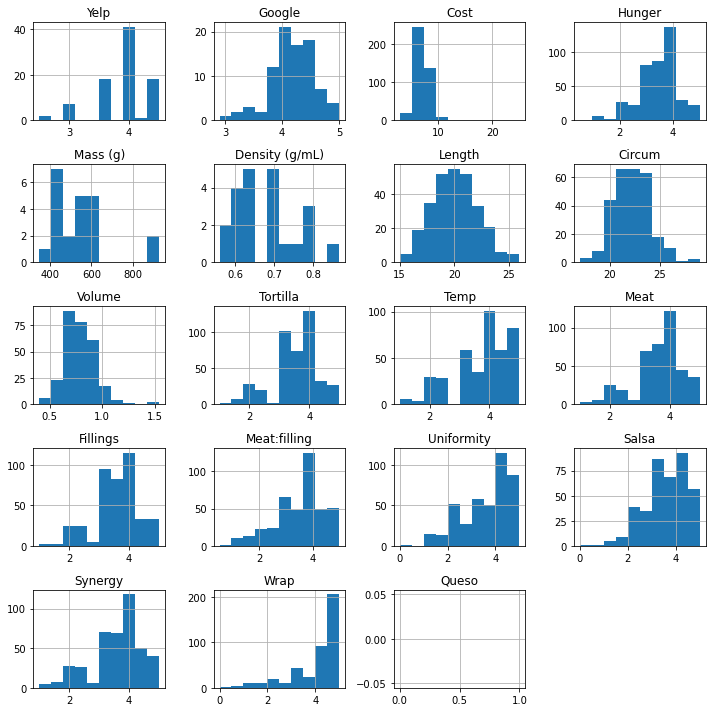

In [6]:
df.select_dtypes('number').hist(figsize = (10,10))
plt.tight_layout();

## Get list of non-numeric columns and determine how many unique values each has

In [7]:
object_columns = [col for col in df.columns if df[col].dtype == 'object']
df[object_columns].nunique()

Location         108
Burrito          132
Date             169
Neighborhood      41
Address           87
URL               86
Chips              4
Reviewer         106
Notes            145
Unreliable         1
NonSD              2
Beef               2
Pico               2
Guac               2
Cheese             2
Fries              2
Sour cream         2
Pork               2
Chicken            2
Shrimp             2
Fish               2
Rice               2
Beans              2
Lettuce            2
Tomato             2
Bell peper         2
Carrots            1
Cabbage            2
Sauce              2
Salsa.1            2
Cilantro           2
Onion              2
Taquito            2
Pineapple          2
Ham                1
Chile relleno      1
Nopales            1
Lobster            1
Egg                1
Mushroom           1
Bacon              1
Sushi              1
Avocado            1
Corn               2
Zucchini           1
dtype: int64

Identify columns that have few unique values; these can be one-hot-encoded. Columns with object type and large numbers of unique values are not suitable for one-hot-encoding.

Examine unique values in object columns:

In [8]:
for c in object_columns:
    if df[c].nunique() < 10:
        print(c, df[c].unique())


Chips [nan 'x' 'X' 'Yes' 'No']
Unreliable [nan 'x']
NonSD [nan 'x' 'X']
Beef ['x' nan 'X']
Pico ['x' nan 'X']
Guac ['x' nan 'X']
Cheese ['x' nan 'X']
Fries ['x' nan 'X']
Sour cream [nan 'x' 'X']
Pork [nan 'x' 'X']
Chicken [nan 'x' 'X']
Shrimp [nan 'x' 'X']
Fish [nan 'x' 'X']
Rice [nan 'x' 'X']
Beans [nan 'x' 'X']
Lettuce [nan 'x' 'X']
Tomato [nan 'x' 'X']
Bell peper [nan 'x' 'X']
Carrots [nan 'x']
Cabbage [nan 'x' 'X']
Sauce [nan 'x' 'X']
Salsa.1 [nan 'x' 'X']
Cilantro [nan 'x' 'X']
Onion [nan 'x' 'X']
Taquito [nan 'x' 'X']
Pineapple [nan 'x' 'X']
Ham [nan 'x']
Chile relleno [nan 'x']
Nopales [nan 'x']
Lobster [nan 'x']
Egg [nan 'x']
Mushroom [nan 'x']
Bacon [nan 'x']
Sushi [nan 'x']
Avocado [nan 'x']
Corn [nan 'x' 'X']
Zucchini [nan 'x']


## Note that some of these use both `x` and `X`. Assume that these are inteded to be the same.
Also, it is likely that `x`, `X` and `Yes` mean the same in the chips column.

## Examine words in `Notes` feature

The `Notes` column is pretty short and succinct, so advanced NLP probably won't be helpful. We can maybe get a little bit of information by looking at a very small subset of the most commonly used words.

In [9]:
CVec(max_features = 20, stop_words = 'english').fit(df['Notes'].fillna('')).get_feature_names()

['best',
 'better',
 'burrito',
 'cheese',
 'chips',
 'fries',
 'good',
 'great',
 'guac',
 'like',
 'little',
 'meat',
 'really',
 'salsa',
 'sauce',
 'shrimp',
 'small',
 'sour',
 'time',
 'tortilla']

## Observe Correlation matrix

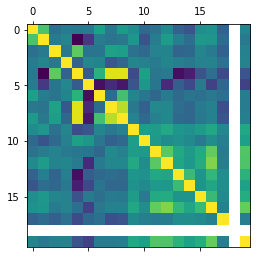

In [10]:
plt.matshow(df.corr());

## Check the Target values and class imbalance:

In [11]:
df['Great'].unique()

array([False,  True])

In [12]:
df['Great'].mean()

0.4323040380047506

43% - 57% is a fairly well-blanced dataset, so we will not need to take extra steps to address class imbalance.

### Clean data

Data Cleaning steps:
* Remove `Queso` `Date`, `Mass` and `Density`
* Convert 'x', 'X' and 'Yes' to True, and 'No', 'NaN' to False in appropriate columns
* Impute target from 'Burrito' and 'Neighborhood' columns
* Find 20 most common words in `Notes`
* Drop object columns with large number of unique values
* Fill NaN values with column means

I will make custom transforms for each of these steps and then put them in a pipeline

Note: I think `Date` might be a useful feature in the model, as we could see if quality trends over time, however, do to our train/validation/test splitting on date, it can't be used as a feature in the model.

In [13]:
class ColumnDropper(TMX):
    '''Drop the unneeded columns'''
    def __init__(self, columns):
        self.columns = columns

    def fit(self,X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(self.columns, axis = 1)
    
    def __repr__(self):
        return 'drop columns'

In [14]:
class XConverter(TMX):
    '''Find any object columns that have only x, X, Yes, No and NaN and convert to boolean'''
    
    def fit(self,X, y=None):        
        self.columns = []
        for c in X.columns:
            if X[c].dtype =='object':
                if len(set(X[c].str.lower().unique()) - set(['X',np.nan, 'x', 'yes','no']))==0:
                    self.columns.append(c)
        return self
                       
    def transform(self, X):
        for col in self.columns:
            X[col] = X[col].isin(['x','X','yes'])
        return X          
    
    def __repr__(self):
        return 'convert boolean responses'

In [15]:
class SimpleImputer(TMX):
    '''Impute categorical values to target values'''
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        
        self.imp = {}
        for c in self.columns:
            data = pd.concat([X[c], y], axis = 1)
            self.imp[c] = data.groupby(c).mean()['Great']
        return self
    
    def transform(self, X):
        for c in self.columns:
            
            X[c] = X[[c]].join(self.imp[c], on=c)['Great']
        return X
    
    def __repr__(self):
        return 'Imputer'

In [16]:
class NotesVectorizer(TMX):
    
    def fit(self, X, y=None):
        X['Notes'] = X['Notes'].fillna('')
        self.cvec = CVec(max_features = 20, stop_words = 'english')
        self.cvec.fit(X['Notes'])        
        return self
    
    def transform(self, X):
        X['Notes'] = X.fillna('')
        X[self.cvec.get_feature_names()] = self.cvec.transform(X['Notes']).todense()
        return X
    
    def __repr__(self):
        return 'notes vectorizer'

In [17]:
class ManyValueDropper(TMX):
    '''Drop any object columns that have too many values to one hot encode'''
    def __init__(self, values):
        self.values = values
        
    def fit(self, X, y=None):           
        self.columns = []
        for c in X.columns:
            if X[c].dtype == 'object' and X[c].nunique() > self.values:
                self.columns.append(c)
                
        return self
    
    def transform(self, X):            
        return X.drop(self.columns, axis=1)
    
    def __repr__(self):
        return 'drop messy columns'

In [18]:
class NaNFiller(TMX):
    
    def fit(self, X, y=None):            
        self.means = X.mean(axis = 0)
        
        return self
    
    def transform(self, X):            
        return X.fillna(self.means)

    def __repr__(self):
        return 'fill NAs'

In [19]:
pipeline = Pipeline([('drop',ColumnDropper(['Queso','Date','Mass (g)','Density (g/mL)'])),
                     ('convert Xs', XConverter()),
                     ('simple imputer', SimpleImputer(['Burrito','Neighborhood'])),
                     ('notes',NotesVectorizer(),),
                     ('drop many values', ManyValueDropper(10)),
                   ('fill NaNs', NaNFiller())])

In [20]:
X = pipeline.fit_transform(df, df['Great'])

## Verify that all values are numeric/boolean and non-NaN

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Burrito        421 non-null    float64
 1   Neighborhood   421 non-null    float64
 2   Yelp           421 non-null    float64
 3   Google         421 non-null    float64
 4   Chips          421 non-null    bool   
 5   Cost           421 non-null    float64
 6   Hunger         421 non-null    float64
 7   Length         421 non-null    float64
 8   Circum         421 non-null    float64
 9   Volume         421 non-null    float64
 10  Tortilla       421 non-null    float64
 11  Temp           421 non-null    float64
 12  Meat           421 non-null    float64
 13  Fillings       421 non-null    float64
 14  Meat:filling   421 non-null    float64
 15  Uniformity     421 non-null    float64
 16  Salsa          421 non-null    float64
 17  Synergy        421 non-null    float64
 18  Wrap      

## Check the Correlation Matrix

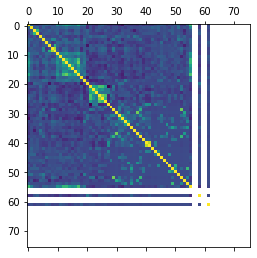

In [22]:
plt.matshow(X.corr());

### Do train/validate/test split

Note: splitting data by year (rather than randomly) makes it inconvenient to use Cross Validation and GridSearch, so I will write my own search.

In [23]:
years = pd.to_datetime(df['Date']).dt.year

In [24]:
df_train = df[years <= 2016]
target_train = df_train.pop('Great')
df_train.shape, target_train.shape


((298, 64), (298,))

In [25]:
df_val = df[years == 2017]
target_val = df_val.pop('Great')
df_val.shape, target_val.shape

((85, 64), (85,))

In [26]:
df_test = df[years >= 2018]
target_test = df_test.pop('Great')
df_test.shape, target_test.shape

((38, 64), (38,))

### Determine baseline accuracy for a naïve classification model

In [27]:
pipeline.steps.append(('MNB',MNB()))

In [28]:
pipeline.fit(df_train, target_train)

Pipeline(steps=[('drop', drop columns),
                ('convert Xs', convert boolean responses),
                ('simple imputer', Imputer), ('notes', notes vectorizer),
                ('drop many values', drop messy columns),
                ('fill NaNs', fill NAs), ('MNB', MultinomialNB())])

In [29]:
pipeline.score(df_train, target_train)

0.8557046979865772

In [30]:
pipeline.score(df_val, target_val)

0.7294117647058823

In [31]:
pipeline.score(df_test, target_test)

0.7631578947368421

### Create a `scikit-learn` pipeline
(Update pipeline by removing MultiNomial Naive Bayes and replacing with Logistic Regression with L1 regularization)

In [32]:
pipeline.steps.pop()
pipeline.steps.append(('min-max scaler',MMS()))
pipeline.steps.append(('logistic_regression', LR(penalty = 'l1',solver = 'liblinear', max_iter = 1000)))
pipeline

Pipeline(steps=[('drop', drop columns),
                ('convert Xs', convert boolean responses),
                ('simple imputer', Imputer), ('notes', notes vectorizer),
                ('drop many values', drop messy columns),
                ('fill NaNs', fill NAs), ('min-max scaler', MinMaxScaler()),
                ('logistic_regression',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

### Train model using training data

In [33]:
train_scores, val_scores, coefs = [], [], []

x = np.logspace(-3, 2, 30)

for C in x:
    pipeline.set_params(logistic_regression__C=C)
    pipeline.fit(df_train, target_train)
    train_scores.append(pipeline.score(df_train, target_train))
    val_scores.append(pipeline.score(df_val, target_val))
    coefs.append(pipeline.steps[-1][1].coef_.flatten())

### Create visualization of model coefficients

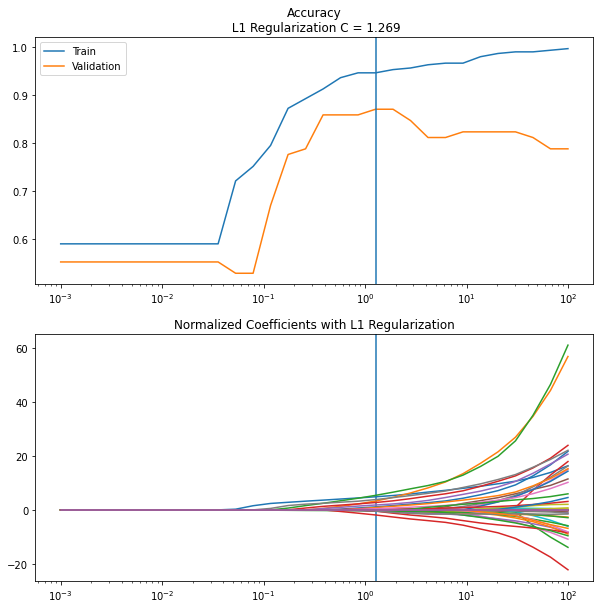

In [34]:
fig, axs = plt.subplots(2,1, figsize = (10,10))
axs[0].plot(x, train_scores, label = 'Train')
axs[0].plot(x, val_scores, label = 'Validation')
axs[0].legend()
best_l1 = x[np.argmax(val_scores)].round(3)
axs[0].set_title(f'Accuracy\n L1 Regularization C = {best_l1}')

[ax.axvline(best_l1) for ax in axs]
[ax.set_xscale('log') for ax in axs]

axs[1].plot(x,coefs)
axs[1].set_title('Normalized Coefficients with L1 Regularization');


In [35]:
best_model = pipeline
best_model.set_params(logistic_regression__C=best_l1)
best_model.fit(df_train, target_train)

Pipeline(steps=[('drop', drop columns),
                ('convert Xs', convert boolean responses),
                ('simple imputer', Imputer), ('notes', notes vectorizer),
                ('drop many values', drop messy columns),
                ('fill NaNs', fill NAs), ('min-max scaler', MinMaxScaler()),
                ('logistic_regression',
                 LogisticRegression(C=1.269, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

### How many coefficients are non-zero after regularization?

In [36]:
(best_model.steps[-1][1].coef_ !=0).sum()

20

### Get model's validation accuracy

In [37]:
best_model.score(df_val, target_val)

0.8705882352941177

### Get your model's test accuracy

In [38]:
best_model.score(df_test, target_test)

0.7105263157894737

## The Logistic Regression (L1) model does not perform as well as the baseline Naive Bayes model. This is not unexpected, as Naive Bayes tends to work well with a large number of features. 

### Try adding PCA to reduce number of features

In [39]:
pipeline.steps.insert(-1,('PCA', PCA(n_components = 20)))
pipeline

Pipeline(steps=[('drop', drop columns),
                ('convert Xs', convert boolean responses),
                ('simple imputer', Imputer), ('notes', notes vectorizer),
                ('drop many values', drop messy columns),
                ('fill NaNs', fill NAs), ('min-max scaler', MinMaxScaler()),
                ('PCA', PCA(n_components=20)),
                ('logistic_regression',
                 LogisticRegression(C=1.269, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

## Repeat Tuning on PCA Model

In [40]:
val_scores = []
Cs = []
comps = []

x = np.logspace(-3, 3, 30)
components = range(5,60,4)

for n_components in components:
    pipeline.set_params(PCA__n_components = n_components)
    for C in x:
        pipeline.set_params(logistic_regression__C=C)
        pipeline.fit(df_train, target_train)
        val_scores.append(pipeline.score(df_val, target_val))
        Cs.append(C)
        comps.append(n_components)

## Best Score

In [41]:
max(val_scores)

0.8470588235294118

## Best value for C (L1 regularization parameter)

In [42]:
best_C = Cs[np.argmax(val_scores)]
best_C

5.298316906283707

## Best value for PCA n_components

In [43]:
best_components = comps[np.argmax(val_scores)]
best_components

21

## Best model

In [44]:
best_model = pipeline
best_model.set_params(PCA__n_components = best_components)
best_model.set_params(logistic_regression__C = best_C)
best_model

Pipeline(steps=[('drop', drop columns),
                ('convert Xs', convert boolean responses),
                ('simple imputer', Imputer), ('notes', notes vectorizer),
                ('drop many values', drop messy columns),
                ('fill NaNs', fill NAs), ('min-max scaler', MinMaxScaler()),
                ('PCA', PCA(n_components=21)),
                ('logistic_regression',
                 LogisticRegression(C=5.298316906283707, max_iter=1000,
                                    penalty='l1', solver='liblinear'))])

## Final Train Score

In [45]:
best_model.fit(df_train, target_train)
best_model.score(df_train, target_train)

0.9496644295302014

## Final Validation Score

In [46]:
best_model.score(df_val, target_val)

0.8470588235294118

## Final Test Score

In [47]:
best_model.score(df_test, target_test)

0.7368421052631579

## Final Test F1 Score

In [48]:
f1_score(target_test, best_model.predict(df_test))

0.7826086956521738